<a href="https://colab.research.google.com/github/ankit250505/CardioVascular-Disease-Prediction-System/blob/main/cardiovascular_disease_prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

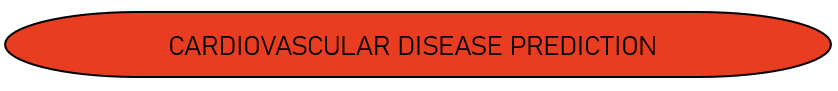

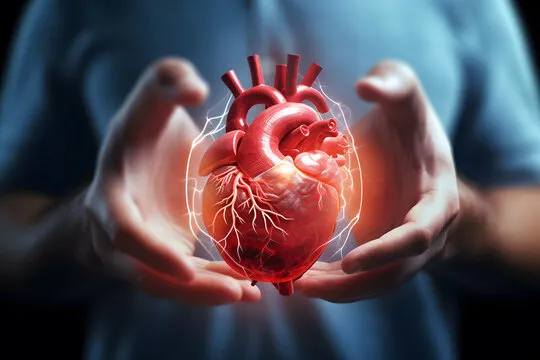

**Heart disease**

---
Cardiovascular disease (CVD) is a group of conditions that affect the heart and blood vessels. These conditions can include problems with the heart's structure, function, and blood flow.

The underlying causes of cardiovascular diseases can vary, but they often involve atherosclerosis, which is the buildup of fatty deposits in the arteries.
Risk factors for developing cardiovascular diseases include diabetes, high blood lipids, excess weight, smoking, excessive drug use, excessive alcoholintake, and genetic predisposition.

---
Common types of cardiovascular diseases include coronary artery disease, heart failure, hypertensive heart disease, and arrhythmia.

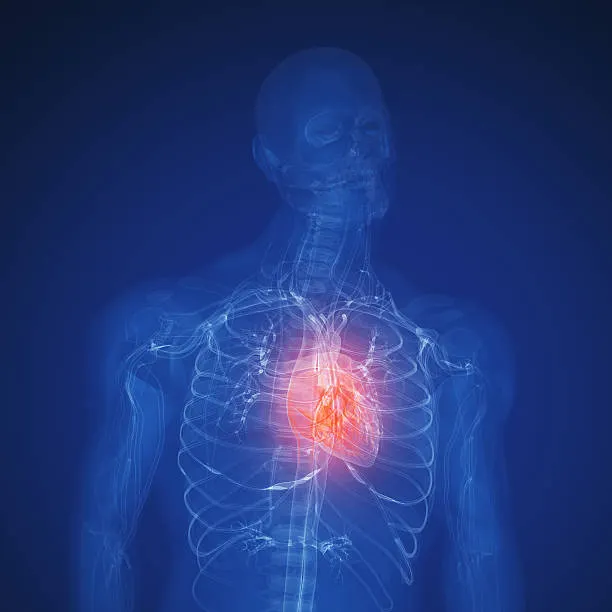

---
CMS compiles claims data for Medicare and Medicaid patients across a variety of categories and years. This includes Inpatient and Outpatient claims, Master Beneficiary Summary Files, and many other files. Indicators from this data source have been computed by personnel in CDC's Division for Heart Disease and Stroke Prevention (DHDSP).

---

**The system is designed to integrate multiple indicators from many data sources to provide a comprehensive picture of the public health burden of CVDs and associated risk factors in the United States. The data are organized by location (national and state) and indicator. The data can be plotted as trends and stratified by sex and race/ethnicity.**

#**IMPORTING NECESSARY LIBRARIES**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.display import HTML
from scipy.stats import uniform

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/major project/cardio_csv.csv")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


#**Data Dictionary**

---
1. id - refers to each preson's id

2. age - age of a person in days

3. gender - gender of a person:
* 1= male
* 2= female

4. height - height of a person

5. weight - normal body weight of a person

6. ap_hi = Systolic blood pressure (higher value)

7. ap_lo = Diastolic blood pressure (lower value)

8. cholestrol = Cholesterol, a waxy, fat-like substance found in your blood.

  * cholesterol:

    * 1 — Normal
    * 2 — Above normal
    * 3 — Well above normal
9. gluc = Glucose, the sugar your body uses for energy.

  * glucose:

    * 1 — Normal
    * 2 — Above normal
    * 3 — Well above normal


10. smoke = smoking, a major red flag in cardiovascular health diseases

  * smoking:

      * 0 — non-smoker
      * 1 — smoker
    
11. alco = alcohol, typically indicates whether a person consumes alcohol

  * alcohol:

      * 0 — Does **not** consume alcohol
      * 1 — **Consumes** alcohol

12. active = the active column represents physical activity status

  * physically active:

      * 0 — Physically inactive (sedentary lifestyle)
      * 1 — Physically active (regular exercise or physical work)

13. cardio = The cardio column is usually the target label

  * cardiovascular disease prone:

      * 0 — **No** cardiovascular disease
      * 1 — **has** cardiovascular disease

---



#**Data Analysis**

In [ ]:
#to check the first 5 records of the dataframe
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
#to check the last 5 records of the dataframe
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [ ]:
#to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
#counts and adds up the total null values in each column
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [ ]:
#tells the accurate size of the dataframe in the form of rows and columns
df.shape

(70000, 13)

In [ ]:
#displays the columns names
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
df.dtypes

,0
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64


**Rename columns for the sake of clarity**

* The feature names in the dataset are abbreviated and hard to understand their meaning.
  A full medical/technical name is hard enough to understand for most of us let alone their short form.
  So to make them a little bit easier to read we will, here under, change the column names of the data frame using information from     
  the UCL data repository.

* We'll also replace the coded categories (1, 2, 3..) to their medical meaning ('normal', 'above normal', etc. for   
  example)

In [ ]:
df['gender'][df['gender'] == 1] = 'male'
df['gender'][df['gender'] == 2] = 'female'

df['smoke'][df['smoke'] == 0] = 'smoker'
df['smoke'][df['smoke'] == 1] = 'non-smoker'

df['alco'][df['alco'] == 0] = 'Does not consume alcohol'
df['alco'][df['alco'] == 1] = 'Consumes alcohol'

df['active'][df['active'] == 0] = 'Physically inactive (sedentary lifestyle)'
df['active'][df['active'] == 1] = 'Physically active (regular exercise or physical work)'

df['cardio'][df['cardio'] == 0] = ' No cardiovascular disease'
df['cardio'][df['cardio'] == 1] = 'has cardiovascular disease'


df['cholesterol'][df['cholesterol'] == 1] = 'normal'
df['cholesterol'][df['cholesterol'] == 2] = 'above normal'
df['cholesterol'][df['cholesterol'] == 3] = 'well above normal'

df['gluc'][df['gluc'] == 1] = 'normal'
df['gluc'][df['gluc'] == 2] = 'above normal'
df['gluc'][df['gluc'] == 3] = 'well above normal'

In [ ]:
#to convert the age of the people from days into years i.e. x days/365 = y years
df['age']=df['age']/ 365
df['age']=df['age'].round()
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,female,168,62.0,110,80,normal,normal,smoker,Does not consume alcohol,Physically active (regular exercise or physica...,No cardiovascular disease
1,1,55.0,male,156,85.0,140,90,well above normal,normal,smoker,Does not consume alcohol,Physically active (regular exercise or physica...,has cardiovascular disease
2,2,52.0,male,165,64.0,130,70,well above normal,normal,smoker,Does not consume alcohol,Physically inactive (sedentary lifestyle),has cardiovascular disease
3,3,48.0,female,169,82.0,150,100,normal,normal,smoker,Does not consume alcohol,Physically active (regular exercise or physica...,has cardiovascular disease
4,4,48.0,male,156,56.0,100,60,normal,normal,smoker,Does not consume alcohol,Physically inactive (sedentary lifestyle),No cardiovascular disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,female,168,76.0,120,80,normal,normal,non-smoker,Does not consume alcohol,Physically active (regular exercise or physica...,No cardiovascular disease
69996,99995,62.0,male,158,126.0,140,90,above normal,above normal,smoker,Does not consume alcohol,Physically active (regular exercise or physica...,has cardiovascular disease
69997,99996,52.0,female,183,105.0,180,90,well above normal,normal,smoker,Consumes alcohol,Physically inactive (sedentary lifestyle),has cardiovascular disease
69998,99998,61.0,male,163,72.0,135,80,normal,above normal,smoker,Does not consume alcohol,Physically inactive (sedentary lifestyle),has cardiovascular disease


In [ ]:
#tells us number of unique values in each column
df.nunique()

,0
id,70000
age,28
gender,2
height,109
weight,287
ap_hi,153
ap_lo,157
cholesterol,3
gluc,3
smoke,2


In [ ]:
#displays a summary of key statistical metrics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,53.338686,6.765294,30.0,48.00,54.0,58.00,65.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0


**To create a Seaborn pairplot from a dataset with 7,000 records, you typically want to sample the dataset first—otherwise, the plot can become too dense and slow to render.**

In [ ]:
df_sampled=df.sample(n=4000,random_state=42)
df_sampled

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
46730,66728,60.0,male,156,64.0,140,80,above normal,normal,smoker,Does not consume alcohol,Physically active (regular exercise or physica...,has cardiovascular disease
48393,69098,60.0,male,170,85.0,160,90,normal,normal,smoker,Does not consume alcohol,Physically active (regular exercise or physica...,has cardiovascular disease
41416,59185,64.0,male,151,90.0,130,80,normal,normal,smoker,Does not consume alcohol,Physically active (regular exercise or physica...,has cardiovascular disease
34506,49288,54.0,male,159,97.0,120,80,normal,normal,smoker,Does not consume alcohol,Physically active (regular exercise or physica...,has cardiovascular disease
43725,62481,50.0,male,164,68.0,120,80,normal,normal,smoker,Does not consume alcohol,Physically active (regular exercise or physica...,No cardiovascular disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,2144,40.0,female,170,67.0,120,70,normal,normal,non-smoker,Does not consume alcohol,Physically inactive (sedentary lifestyle),No cardiovascular disease
849,1184,51.0,male,155,86.0,130,80,normal,normal,smoker,Does not consume alcohol,Physically active (regular exercise or physica...,No cardiovascular disease
10527,15036,52.0,male,164,67.0,120,80,normal,normal,smoker,Does not consume alcohol,Physically active (regular exercise or physica...,has cardiovascular disease
31444,44888,56.0,female,167,72.0,120,80,normal,normal,smoker,Does not consume alcohol,Physically active (regular exercise or physica...,No cardiovascular disease


#**PLOTTINGS**

1.**Target variable distribution**
---
---
Exploring Features/Cardio

In this section we'll investigate all the features (including the cardio) in detail.

We will look at the statistical summary when possible and the distributions of some of them as well, starting from the cardio.

---

Target distribution

We observe that the target is fairly balanced with ~50% with no heart disease and ~50% with heart disease. So no need to worry about target imbalance.

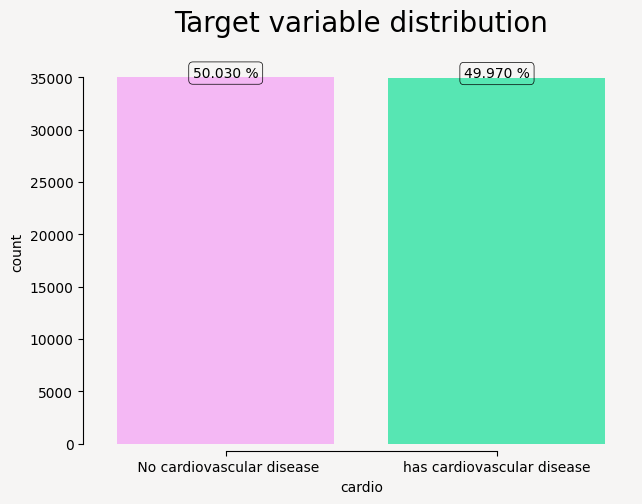

In [ ]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['cardio'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,'{:0.3f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

In [ ]:
#approximate
df.value_counts(['cardio'])

,count
cardio,
No cardiovascular disease,35021
has cardiovascular disease,34979


2.**Density plot**
---
---
**Grouping Features (by data type)**

We're classifying your dataset's columns (features) into three types:
1. ✅ num_feats — Numerical Features
These are continuous or ordered numbers that can take a wide range of values.


2. ✅ bin_feats — Binary Categorical Features
These are categorical features with only two values (like 0 or 1).


3. ✅ nom_feats — Nominal Categorical Features (Multi-class)
These are non-binary categorical features with 3+ categories.

In [ ]:
# numerical fearures
num_feats = ['id', 'age' , 'height' , 'weight', 'ap_hi', 'ap_lo', 'cholesterol']

# categorical (binary)
bin_feats = ['gender', 'smoke', 'alco', 'active', 'cardio']

# caterorical (multi-)
nom_feats= ['cholesterol', 'gluc']
cat_feats = nom_feats + bin_feats

**Statistical summary**

For the numerical features we can apply the handy pandas data.describe() method and get the global statistical summary.

Key figures are highlighted below.

In [ ]:
df_sampled[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
id,4000.0,50310.79325,28699.787633,121.0,25221.75,51122.5,74611.25,99963.0
age,4000.0,53.29425,6.698499,39.0,48.00,54.0,58.00,65.0
height,4000.0,164.52950,8.235083,66.0,159.00,165.0,170.00,198.0
weight,4000.0,74.03755,14.321556,10.0,65.00,72.0,82.00,183.0
ap_hi,4000.0,127.12175,31.319046,-120.0,120.00,120.0,140.00,1300.0
ap_lo,4000.0,92.49475,103.576696,0.0,80.00,80.0,90.00,1200.0


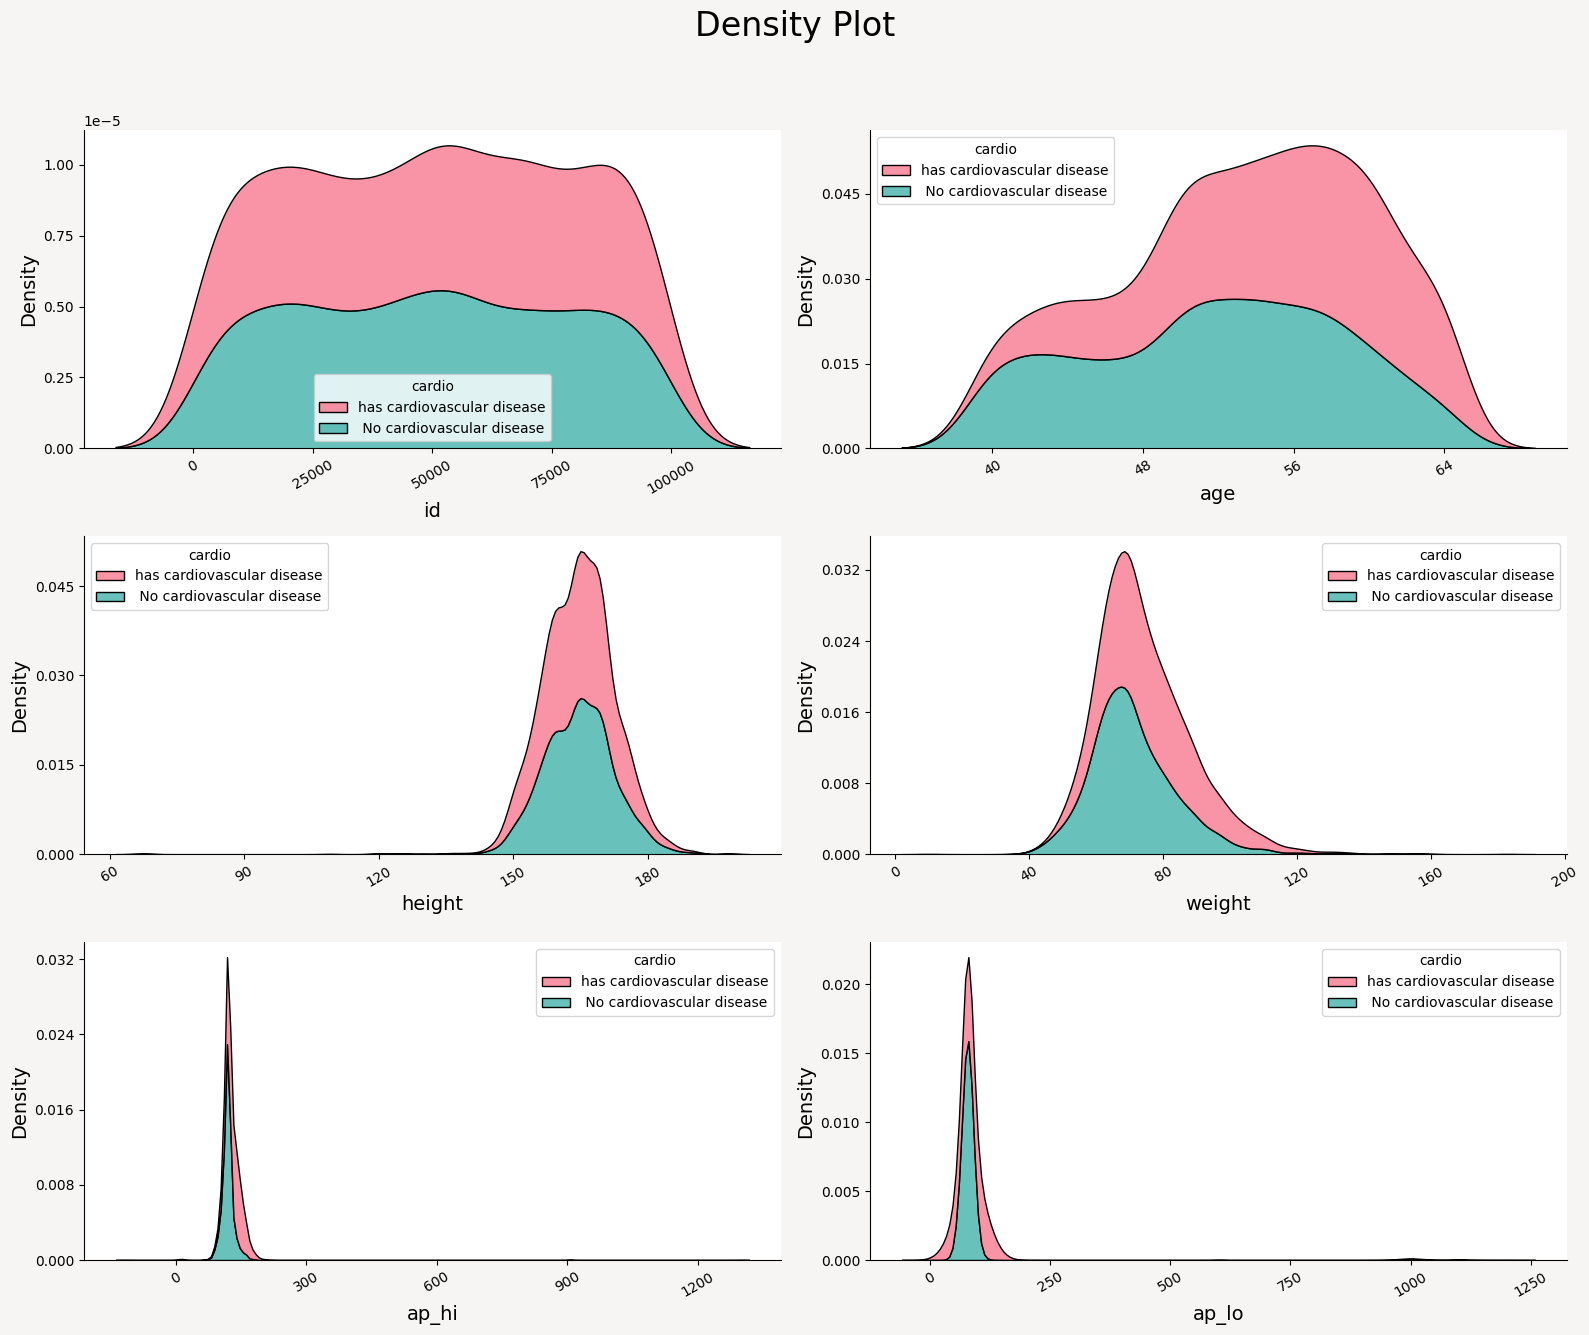

In [ ]:
from matplotlib.ticker import MaxNLocator
# Filter only numeric columns
num_feats = [col for col in num_feats if pd.api.types.is_numeric_dtype(df[col])]
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
fig, axs = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92)
plt.suptitle('Density Plot' ,fontsize = 24);


axs = axs.flatten()

for i, col in enumerate(num_feats):
    ax = axs[i]
    sns.kdeplot(data=df_sampled, x=col, hue="cardio", multiple="stack", palette='husl', ax=ax)

    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel("Density", fontsize=14)

    # Rotate x-ticks to prevent overlap
    ax.tick_params(axis='x', labelrotation=30)

    # Set locator to reduce overlapping of ticks
    ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    sns.despine(ax=ax)

# Hide unused subplots if any
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


3.**Distribution of Categorical Features**
---

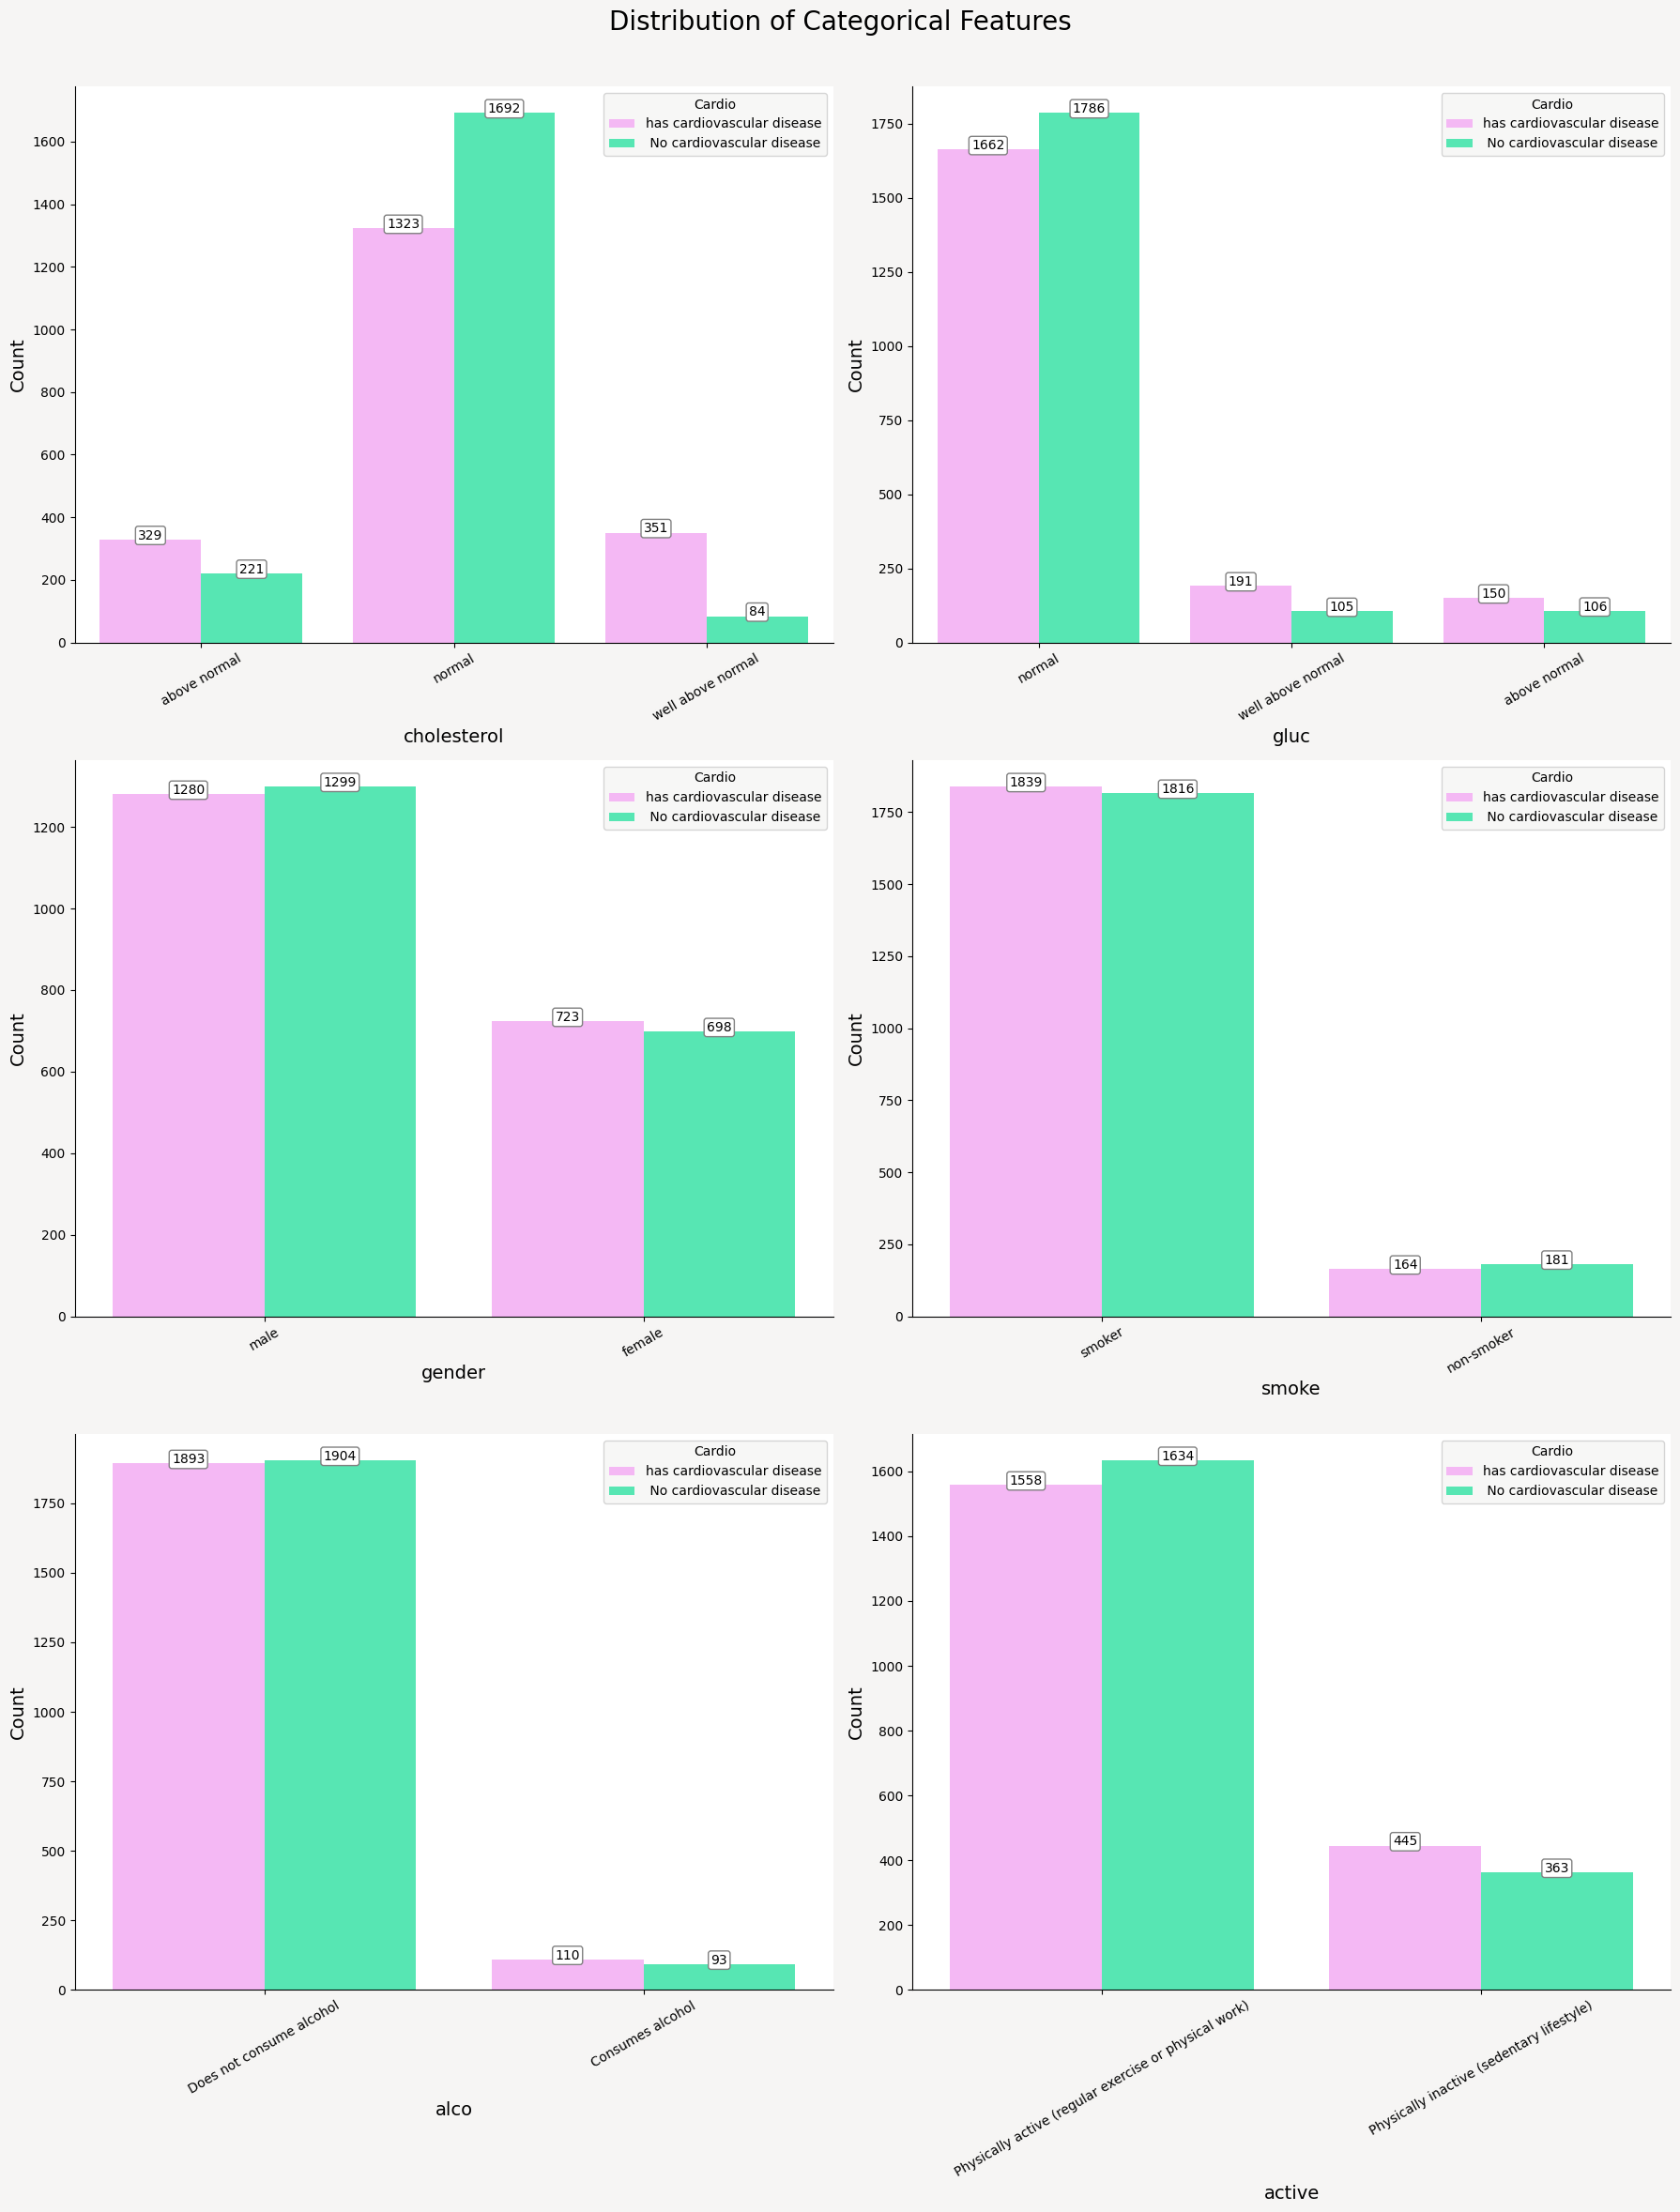

In [ ]:
def count_plot(df_sampled, cat_feats):

    L = len(cat_feats)
    ncol = 2
    nrow = int(np.ceil(L / ncol))
    remove_last = (nrow * ncol) - L

    fig, axes = plt.subplots(nrow, ncol, figsize=(18, 24), facecolor='#F6F5F4')
    axes = axes.flatten()
    fig.subplots_adjust(top=0.93)

    for idx, col in enumerate(cat_feats):
        ax = axes[idx]
        sns.countplot(data=df_sampled, x=col, hue="cardio", palette=mypal[1::4], ax=ax)
        ax.set_xlabel(col, fontsize=14)
        ax.set_ylabel("Count", fontsize=14)
        ax.tick_params(axis='x', rotation=30)  # Rotate x-axis labels
        sns.despine(ax=ax, right=True)
        ax.legend(title='Cardio', facecolor='#F6F5F4')

        # Annotate bars
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.text(p.get_x() + p.get_width()/2., height + 1, f'{int(height)}',
                        ha="center", fontsize=10,
                        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.2'))

    # Hide unused subplots
    if remove_last > 0:
        for i in range(1, remove_last + 1):
            axes[-i].set_visible(False)

    plt.suptitle('Distribution of Categorical Features', fontsize=20, y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Avoid title overlap
    plt.show()

count_plot(df_sampled, cat_feats[0:-1])


#**Predictions**

**Note :**

We have 7000 case which is a very large amount of data to do any serious prediction.
Therefore, any conclusion made must be taken with cautions. T
his notebook is merely an excercise on binary classification algorithms.

**Scikit Learn Classifiers**
---
This is a binary classification problem (has-disease or no-disease cases). Scikit learn offers a wide range of classification algorithms and is often the starting point in most/traditional machine learning challenges, so we start by exploring few of the classification alorithms from the sklearn libarary such as Logistic Regression, Nearest Neighbors, Support Vectors, Nu SVC, Decision Tree, Random Forest, & Naive Bayes.

---
Let's first build simple models using the above mentioned ML algorithms and later we will optimize them by tuning the parameters.

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import shap

**Given a dataframe and its categorical features, this function returns label-encoded dataframe**

In [ ]:
def label_encode_cat_features(df_sampled, cat_features):
  label_encoder = LabelEncoder()
  for col in cat_features:
      df_sampled[col] = label_encoder.fit_transform(df_sampled[col])

      data=df_sampled

  return data


**Given a list of classifiers, this function calculates the accuracy, ROC_AUC and Recall and returns the values in a dataframe.**

In [ ]:
def score_summary(names, classifiers):
    cols = ["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)

    for name, clf in zip(names, classifiers):
        clf.fit(xtrain, ytrain)
        pred = clf.predict(xtest)
        accuracy = accuracy_score(ytest, pred)

        pred_proba = clf.predict_proba(xtest)[:, 1]
        fpr, tpr, thresholds = roc_curve(ytest, pred_proba)
        roc_auc = auc(fpr, tpr)

        cm = confusion_matrix(ytest, pred)
        tp = cm[1,1]
        fn = cm[1,0]
        fp = cm[0,1]

        recall = tp / (tp + fn) if (tp + fn) != 0 else 0
        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        f1 = 2 * recall * precision / (recall + precision) if (recall + precision) != 0 else 0

        row = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = pd.concat([data_table, row], ignore_index=True)

    return data_table


**Plots confusion matrices in a subplots.**

**Args:**

**names : list of names of the classifier**

**classifiers : list of classification algorithms**

**nrows, ncols : number of rows and rows in the subplots**

**fig_a, fig_b : dimensions of the figure size**

In [ ]:
def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))
    axes = axes.flatten()  # Flatten in case of 2D axes array
    total = len(classifiers)

    for i, (name, clf) in enumerate(zip(names, classifiers)):
        clf.fit(xtrain, ytrain)
        pred = clf.predict(xtest)
        cm = confusion_matrix(ytest, pred)

        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap="Blues", ax=axes[i], colorbar=False)
        axes[i].set_xlabel("Predicted", fontsize=8)
        axes[i].set_ylabel("Actual", fontsize=8)
        axes[i].tick_params(labelsize=8)
        axes[i].set_title(name)
    # Hide unused subplots (last two in 3x3 layout)
    for j in range(total, nrows * ncols):
        fig.delaxes(axes[j])  # Remove axes entirely
        # OR, if you prefer to keep them blank but visible:
        # axes[j].axis('off')plt.tight_layout()
    plt.show()

**Given a list of classifiers, this function plots the ROC curves**

In [ ]:
def roc_auc_curve(names, classifiers):
    plt.figure(figsize=(12, 8))

    for name, clf in zip(names, classifiers):
        clf.fit(xtrain, ytrain)

        pred_proba = clf.predict_proba(xtest)[:, 1]

        fpr, tpr, thresholds = roc_curve(ytest, pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) curves', fontsize=20)
        plt.legend(loc="lower right")


In [ ]:
# split the data into train and test sets

cat_features = cat_feats
data = label_encode_cat_features(df_sampled, cat_features)
features = data.columns[:-1]

x = data[features]
y = data['cardio']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.8, random_state=0)


# classifier algorithms with default parameters

names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'Naive Bayes'
    ]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=0),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=0),
    NuSVC(probability=True, random_state=0),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    GaussianNB()
    ]

**Performance metric**

There are several metrics that can be used to gauge the performance of a given classification algorithm. The choice of the 'appropriate' metrics is then dependent on the type of problem we are dealing with. There are case where, for example, accuracy can be the right choice and in some other case a recall or precision could be more fitting to the purpose. Since we are dealing with medical case (classify if a case is positive for heart disease or not), we could use recall (true positive rate or sensitivity) as performance metrics to choose our classifier. Note here that we do not want to classify positive (has disease) cases as negative (no disease).

---

**PERFORMANCE METRICS SUMMARY TABLE**



In [ ]:
(score_summary(names, classifiers)
 .sort_values(by='Accuracy', ascending=False)
 .style
 .background_gradient(cmap='coolwarm')
 .bar(subset=["ROC_AUC"], color='#6495ED')
 .bar(subset=["Recall"], color='#ff355d')
 .bar(subset=["Precision"], color='lightseagreen')
 .bar(subset=["F1"], color='gold')
)


,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
5,Random Forest,73.406250,0.786480,0.711875,0.744931,0.728028
0,Logistic Regression,71.375000,0.777229,0.685000,0.726790,0.705277
4,Decision Tree,62.156250,0.621563,0.653750,0.614210,0.633364
6,Naive Bayes,60.343750,0.765006,0.261875,0.826430,0.397722
1,Nearest Neighbors,51.000000,0.508265,0.257500,0.520202,0.344482
3,Nu SVC,50.656250,0.501493,0.401250,0.508314,0.448481
2,Support Vectors,49.093750,0.492030,0.628125,0.492889,0.552350


**ROC CURVES**

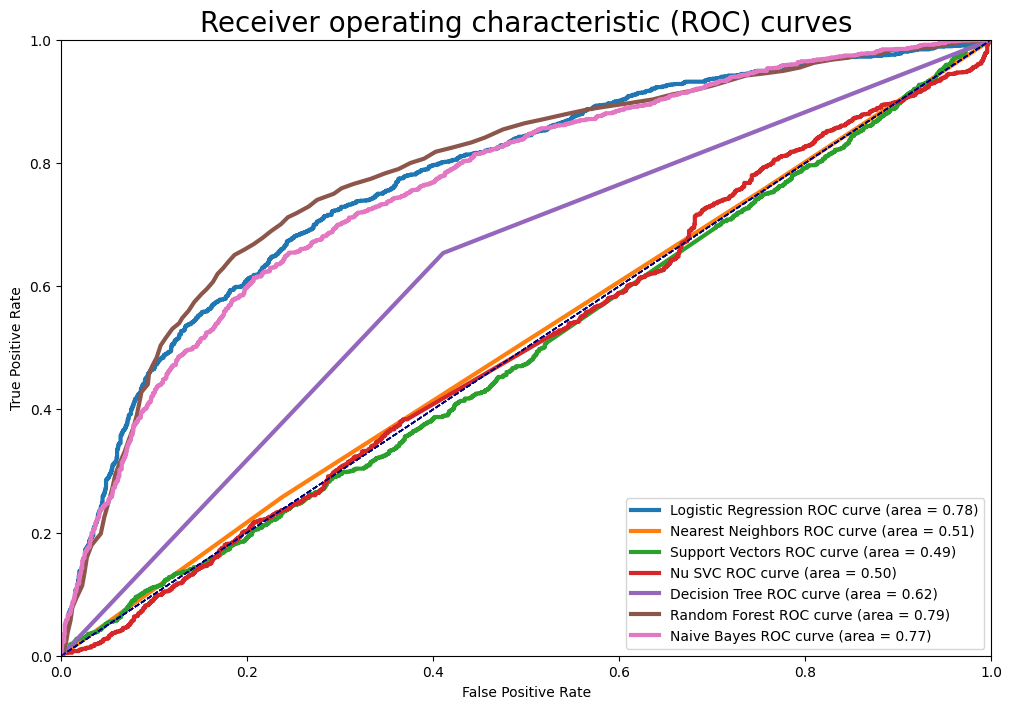

In [ ]:
roc_auc_curve(names, classifiers)

**Confusion Matrix**

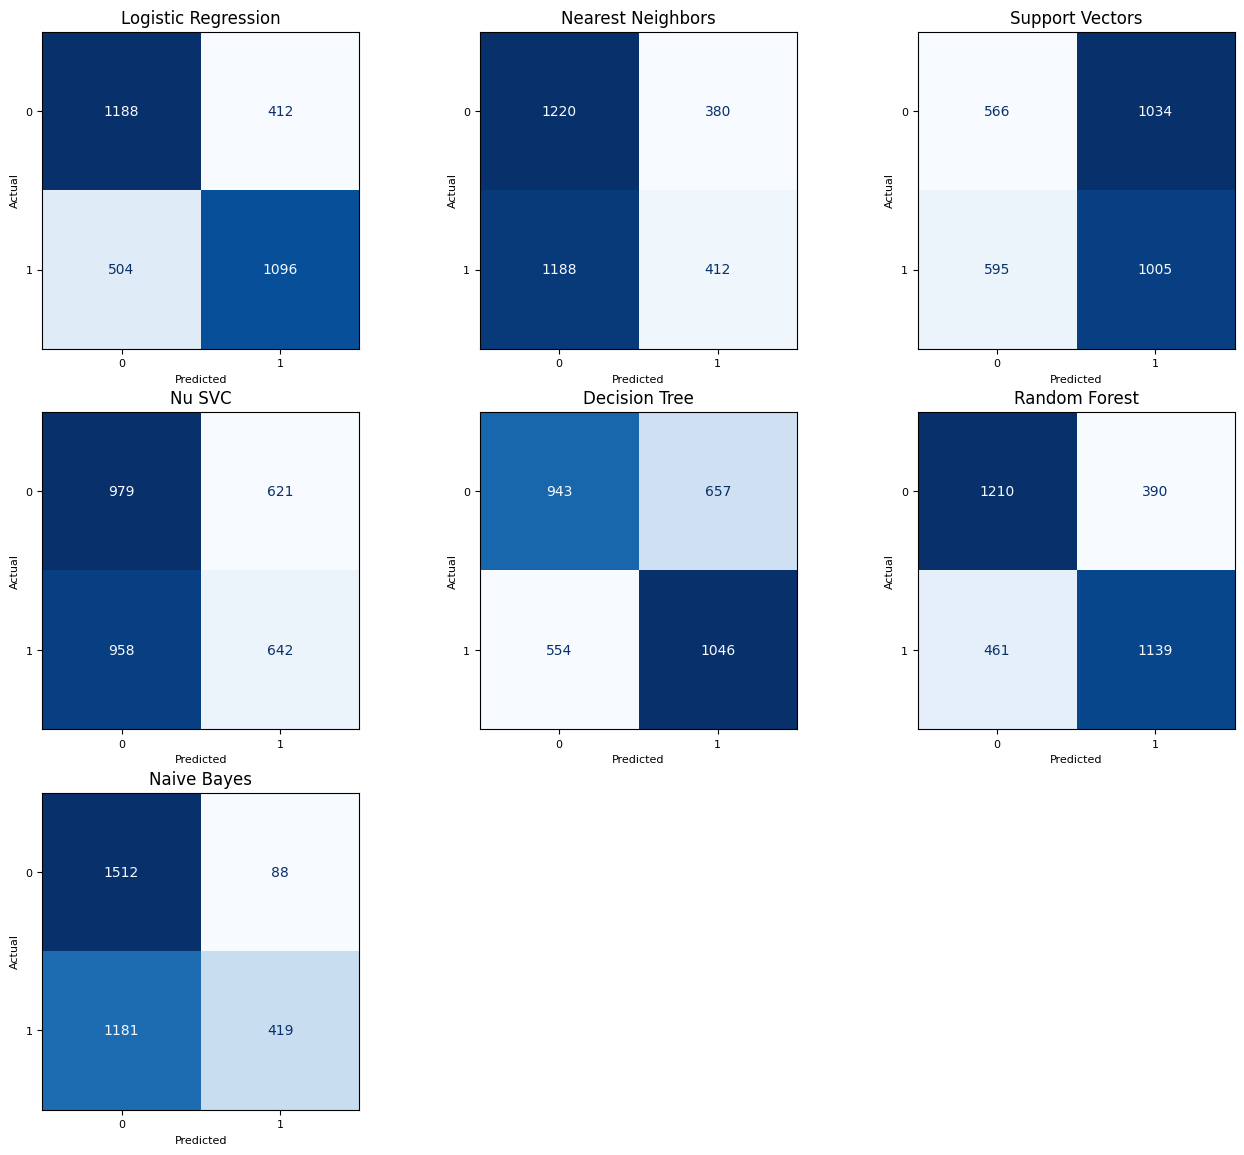

In [ ]:
plot_conf_matrix(names, classifiers, nrows=3, ncols=3, fig_a=16, fig_b=14 )


---
Now we have seen all the performance metrics of the classifiers, it is decision time for us to choose the best possible classifier algorithm.

Based on precision **Naive Bayes** ranks first **(82.6%)**;

whereas if we see the recall, **Random Forest** ranks first with **(71%)**.

In the case of Accuracy, **Random Forest** ranks first with **(73.4%)**.

**So which one to choose?**
---
The F1-score can give us a balance between recall and precision.

---

✅**Random Forest happens to have the best F1-score so we choose Random Forest as our best classifier.**

**Note: If I were consulting a clinic doing a heart disease screening test, I would like to strike a perfect balance between precision and recall (I don't want the clinic to risk their reputation of by handing out too many false positive result but all without risking their clients' health by predicting too many false negatives). Therefore, I would advice them to choose the model which gives a higher F1-score, i.e the Random Forest Classifier.**

**CONCLUSION REMARK**
---

In conclusion, the development of a cardiovascular disease (CVD) prediction model using machine learning techniques has demonstrated promising results, with the Random Forest Classifier emerging as the most effective algorithm among those tested.

Through rigorous evaluation using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC, the Random Forest model consistently outperformed other classifiers, indicating its strong predictive power and robustness in handling complex, non-linear relationships in the data. Its ensemble nature allows it to reduce overfitting while maintaining high accuracy, making it well-suited for medical datasets where reliability is critical.

The model's performance suggests that machine learning, particularly Random Forest, can play a vital role in early detection of cardiovascular risk, potentially assisting healthcare professionals in making data-driven decisions. While the results are encouraging, it is important to note that the model should complement—not replace—clinical judgment. For real-world deployment, further validation with larger and more diverse datasets, along with integration into user-friendly tools for clinical use, is essential.

Overall, this project reinforces the potential of AI in preventive healthcare and paves the way for more accurate, accessible, and timely predictions of cardiovascular disease risk using interpretable and powerful models like Random Forest.


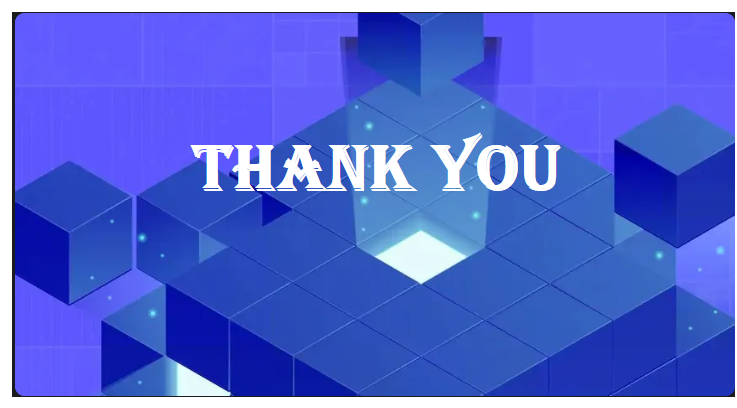